<a href="https://colab.research.google.com/github/JBenjaminGM/ProyectoFinal-Analisis-de-Sentimiento/blob/main/Interpretaci%C3%B3n_de_resultados_en_gr%C3%A1ficos_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
data = pd.read_csv('data_final.csv', sep=';', encoding='latin-1')
data

,Username,Comments,Favorites,Date,Tweet,Author Followers,Sentimiento
0,turdepeish,3,8,6/10/2023 12:24,hace rato era no faltaran los sjw a decir ayy...,140,Neutral
1,lazaro1975,13,7,6/10/2023 14:33,desde hace casi 30 años salgo siempre con mis...,262,Positivo
2,cazarte_carlos,1,5,6/10/2023 13:55,maravilla la penepe con competencias de jue...,289,Positivo
3,gabrielal4m0,2,33,6/10/2023 13:20,jfowks la modificación del código no ha afec...,1059,Negativo
4,YorshCarlin,1,8,6/10/2023 14:27,una puerta abierta al abuso policialincluso t...,106,Negativo
...,...,...,...,...,...,...,...
134,z_bird986,0,0,6 oct.,a quienes vean sospechosos o a quien creen qu...,0,Positivo
135,@cazarte_carlos,0,0,6 oct.,la modificación del código no ha afectado esa...,0,Negativo
136,MiguelA04899081,0,0,6/10/2023 14:42,¿acusar y denunciar cuando están coimeando te...,0,Negativo
137,LuisAri77761564,0,0,6/10/2023 21:50,todo es negociable no,1,Negativo


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Username          139 non-null    object
 1   Comments          139 non-null    int64 
 2   Favorites         139 non-null    int64 
 3   Date              139 non-null    object
 4   Tweet             139 non-null    object
 5   Author Followers  139 non-null    int64 
 6   Sentimiento       139 non-null    object
dtypes: int64(3), object(4)
memory usage: 7.7+ KB


!pip install wordcloud

{'hace': 6, 'rato': 1, 'era': 3, 'faltaran': 1, 'sjw': 1, 'decir': 2, 'ayy': 2, 'diktadurah': 1, 'mis': 3, 'dhereshoz': 1, 'umanoz': 1, 'sarta': 1, 'babosos': 1, 'desde': 5, 'casi': 2, '30': 1, 'años': 3, 'salgo': 3, 'siempre': 4, 'documentos': 5, 'solo': 11, 'perú': 2, 'sino': 1, 'extranjero': 4, 'cual': 1, 'problema': 3, 'debe': 5, 'teme': 2, 'cuanto': 1, 'delincuente': 1, 'requisitoria': 1, 'pasea': 1, 'libre': 3, 'maravilla': 1, 'penepe': 2, 'competencias': 1, 'juez': 2, 'país': 2, 'maravilloso': 1, 'mente': 1, 'creativa': 1, 'dónde': 1, 'salió': 1, 'proyecto': 1, 'ser': 9, 'muuuuuy': 1, 'inteligente': 1, 'jfowks': 1, 'modificación': 2, 'del': 7, 'código': 2, 'ha': 3, 'afectado': 2, 'esa': 10, 'parte': 3, 'noticia': 4, 'debería': 3, 'penepé': 2, 'puede': 4, 'detenerte': 2, 'hasta': 5, 'doce': 2, 'horas': 8, 'sales': 2, 'sospechan': 2, 'eres': 6, 'presta': 3, 'discriminación': 2, 'acciones': 3, 'arbitrarias': 2, 'contra': 4, 'población': 3, 'vulnerable': 2, 'puerta': 1, 'abierta': 1

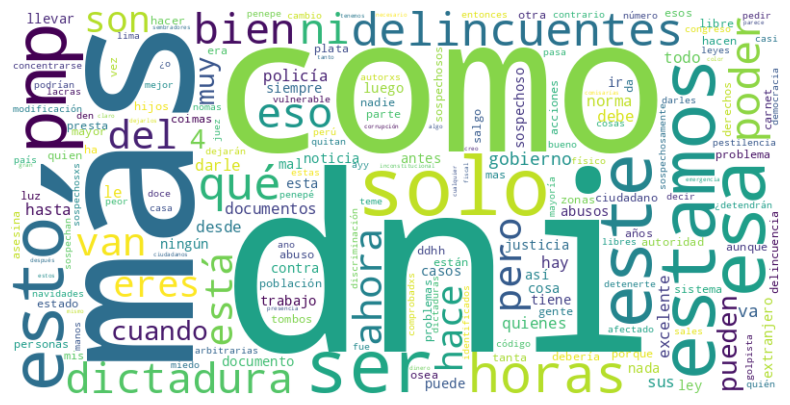

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Reemplaza 'data' con el nombre de tu DataFrame y 'Tweet' con el nombre de tu columna
columna_texto = 'Tweet'

# Obtener el texto de la columna seleccionada
textos = data[columna_texto].astype(str).tolist()
texto_completo = ' '.join(textos)

# Lista de palabras que deseas excluir
#monosilabos = []
monosilabos = ['al', 'lo', '.','de', 'que','el', 'la' ,'en','es','a', 'e', 'o', 'u', 'y', 'mi', 'tu', 'su', 'nos', 'os', 'me', 'te', 'se', 'lo', 'la', 'les', 'los', 'las', 'un', 'una', 'uno', 'unas', 'para','q', 'unos', 'con', 'sin', 'por', 'y', 'si', 'no', 'sí', 'ya',]

# Crear un conjunto de monosílabos para una búsqueda más eficiente
monosilabos_set = set(monosilabos)

# Eliminar las palabras excluidas del texto
texto_completo = ' '.join([palabra for palabra in texto_completo.split() if palabra.lower() not in monosilabos_set])

# Crear un diccionario de frecuencia de palabras
frecuencia_palabras = {}
for palabra in texto_completo.split():
    frecuencia_palabras[palabra] = frecuencia_palabras.get(palabra, 0) + 1

print(frecuencia_palabras)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia_palabras)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
frecuencia_palabras_ordenado = dict(sorted(frecuencia_palabras.items(), key=lambda item: item[1], reverse=True))

print("Las 10 palabras más repetidas:")
for i, (palabra, frecuencia) in enumerate(frecuencia_palabras_ordenado.items()):
    print(f"{i + 1}. {palabra}: {frecuencia}")
    if i == 9:
        break

Las 10 palabras más repetidas:
1. dni: 21
2. más: 13
3. como: 12
4. solo: 11
5. esa: 10
6. estamos: 10
7. ser: 9
8. esto: 9
9. este: 9
10. pnp: 9


In [39]:
Nro_Tweet_Ps=data.groupby('Sentimiento')['Sentimiento'].count()['Positivo']
Nro_Tweet_Ne=data.groupby('Sentimiento')['Sentimiento'].count()['Negativo']
Nro_Tweet_Neu=data.groupby('Sentimiento')['Sentimiento'].count()['Neutral']
Nro_Tweet_Total=Nro_Tweet_P=data.groupby('Sentimiento')['Sentimiento'].count()['Positivo']+data.groupby('Sentimiento')['Sentimiento'].count()['Negativo']+data.groupby('Sentimiento')['Sentimiento'].count()['Neutral']
print(Nro_Tweet_Ps)
print(Nro_Tweet_Ne)
print(Nro_Tweet_Neu)
print(Nro_Tweet_Total)


64
52
23
139


In [40]:
import plotly.graph_objects as go

fig_comt_tweet = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = Nro_Tweet_Total,
    mode = "gauge+number+delta",
    title = {'text': "Sentimientos"},
    delta = {'reference': 100},
    gauge = {'axis': {'range': [None, 170]},
             'steps' : [
                 {'range': [0, Nro_Tweet_Neu], 'color': "orange"},
                 {'range': [Nro_Tweet_Neu, Nro_Tweet_Ne], 'color': "red"},
                 {'range': [Nro_Tweet_Ne, Nro_Tweet_Ps], 'color': "blue"}],
             'threshold' : {'line': {'color': "red", 'width': 2}, 'thickness': 0.75, 'value': 200}}))

fig_comt_tweet.show()

In [41]:
#Gráfica de representación en en porcentanjes de la cantidad de sentimientos por tipo de sentimiento.
import plotly.express as px
import pandas as pd

# Datos de muestra
df_interp_Tweet=pd.DataFrame(dict(
                            descripcion=['Total','Positivos','Negativos','Neutros'],
                            porcentaje=[round(Nro_Tweet_Total/Nro_Tweet_Total*100,2),
                                        round(Nro_Tweet_Ps/Nro_Tweet_Total*100,2),
                                        round(Nro_Tweet_Ne/Nro_Tweet_Total*100,2),
                                        round(Nro_Tweet_Neu/Nro_Tweet_Total*100,2) ]))

fig_comt_tweet = px.funnel(df_interp_Tweet, x = 'porcentaje', y = 'descripcion', title = "Sentimientos")


fig_comt_tweet.show()

In [43]:
#Grafica de barras cantidad de clasificación de sentimiento por tipo de sentimiento.

import plotly.express as px
import pandas as pd

# Datos de muestra
df_Comentarios_tweet = pd.DataFrame(dict(
    Sentimientos = [ "Negativos","Neutros","Positivos"],
    Cantidad = [Nro_Tweet_Ne, Nro_Tweet_Neu,Nro_Tweet_Ps ]))

fig_comt_tweet = px.bar(df_Comentarios_tweet, x = 'Sentimientos', y = 'Cantidad', color = 'Cantidad')

fig_comt_tweet.show()


